# Homework 2 - Python Portion


### Problem 1b



Text(0, 0.5, 'y')

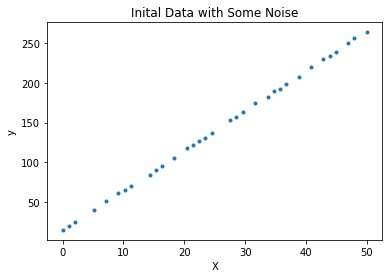

In [206]:
# For this problem we will generate a synthetic data set 
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 5; b = 15 # data with approximate straight line


# numpy.linspace(start, stop, number = 50)
X = np.linspace(0, 50, 50)

# Line mX + b + some normal noise
y = m*X + np.random.normal(0,1,len(X))+ b

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.33, random_state=42)

# Reshaping to be column vectors - Must assign the reshaped vars -- Piazza Question
X_tr,y_tr,X_te,y_te = X_tr.reshape(-1,1),y_tr.reshape(-1,1),X_te.reshape(-1,1),y_te.reshape(-1,1)

plt.plot(X_tr,y_tr,'.')
plt.title("Inital Data with Some Noise")
plt.xlabel("X")
plt.ylabel("y")


### Problem 1c



Residual sum of squares: 0.78


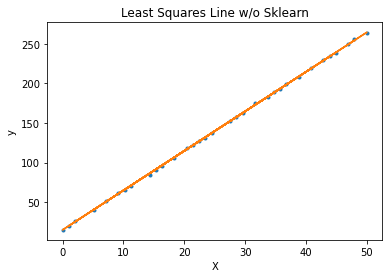

In [207]:
# We did most of the regresstion training in the last problem.
import math
import operator

#find the mean of x and y
mean_x = np.mean(X_tr)
mean_y = np.mean(y_tr)

# total numer of values in X
m = len(X_tr)

# Use the least squares formula to find m and b for our eqation y = mx + b
top = 0
bot = 0

for i in range(m):
    top += (X_tr[i] - mean_x) * (y_tr[i] - mean_y)
    bot += (X_tr[i] - mean_x) ** 2
m = top/bot
b = mean_y - (m*mean_x)
y_plot = m*X_tr + b
plt.plot(X_tr,y_tr,'.')
plt.plot(X_tr,y_plot)
plt.title("Least Squares Line w/o Sklearn")
plt.xlabel("X")
plt.ylabel("y")

# The mean square error
print("Residual sum of squares: %.2f"% np.mean((y_tr - y_plot) ** 2))


### Problem 1d

Residual sum of squares: 0.91


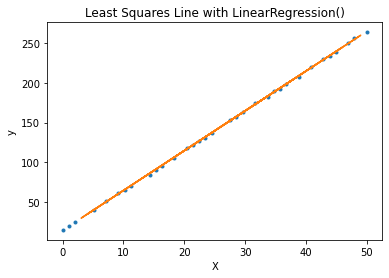

In [208]:
# We will now use the sk-learn pagacke to verify our results from 1c
#Define the Model to be used
regr = LinearRegression()
#Train the linear model with the X & y training data using the ".fit(X_TrainingData,y_TrainingData)" function
regr.fit(X_tr, y_tr) 
plt.plot(X_tr,y_tr,'.')
plt.plot(X_te, regr.predict(X_te))
plt.title("Least Squares Line with LinearRegression()")
plt.xlabel("X")
plt.ylabel("y")

# The mean square error
print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_te) - y_te) ** 2))

### Problem 2a

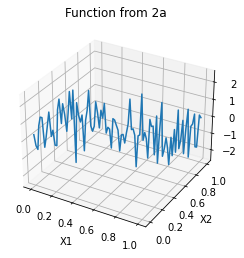

In [209]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#create our variables
X1 = np.linspace(0,1,100)
X2 = np.linspace(0,1,100)
y = np.linspace(0,1,100)
for i in range(len(X1)):
  y[i] = math.sin(X1[i]+5*X2[i]) + np.random.normal(0,1) # function given + random noise

#graph
ax1 = plt.axes(projection='3d')
ax1.plot3D(X1,X2,y) 
plt.title("Function from 2a")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



### Problem 2b

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

#writing the ride regression function
def ridge_regression(X_train, y_train, X_test, y_test, _lambda, models_to_plot):
    # Use Polynomial features and pipeline to fit data
    poly_features = PolynomialFeatures(degree = 15)
    ridge = Ridge(alpha=_lambda, normalize=True)
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",ridge)])
    pipeline.fit(X_train[:,np.newaxis], y_train)
    
    # Get predication with the model trained with pipeline
    pred_train = pipeline.predict(X_train[:,np.newaxis])
    pred_test = pipeline.predict(X_test[:,np.newaxis])
    
    # MSE and RSS
    train_mse = mean_squared_error(y_train,pred_train)
    test_mse = mean_squared_error(y_test,pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)

    # plot
    if _lambda in models_to_plot:
        plt.subplot(models_to_plot[_lambda])
        plt.tight_layout()
        plt.plot(X_train[X_train.argsort()], pred_train[X_train.argsort()])
        plt.plot(X_train, y_train,'.')
        plt.title('lambda: %.3g'%_lambda)
    
    ret = [train_mse, test_mse, train_rss, test_rss]
    ret.extend([pipeline.steps[1][1].intercept_])
    ret.extend(pipeline.steps[1][1].coef_[1:])
    return ret

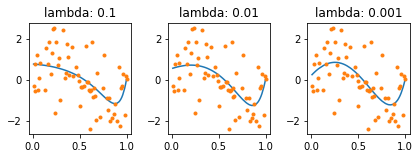

In [211]:
# Now let's implement the problem

# train-test split
X_tr, X_te, y_tr, y_te = train_test_split(X1, y, test_size=0.33, random_state=42)

# Set the different values of lambda to be tested
lambda_ridge = [0.1, 0.01, 0.001]

# Initialize the dataframe for storing coefficients.
col = ['train_mse','test_mse','train_rss','test_rss'] + ['w%d'%i for i in range(16)]
ind = ['lambda_%.2g'%lambda_ridge[i] for i in range(0,3)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {0.1:231,0.01:232,0.001:233}

#Iterate through all powers and assimilate results
for i in range(len(lambda_ridge)):
    coef_matrix_ridge.iloc[i,:20] = ridge_regression(X_tr, y_tr, X_te, y_te, _lambda=lambda_ridge[i], models_to_plot=models_to_plot)


### Problem 2c

/Users/victoria/opt/anaconda3/envs/cse217a/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011525277946745405, tolerance: 0.009989758416505378
  positive)


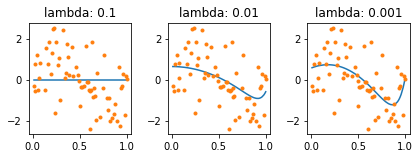

In [212]:
# Implement the function
lambda_lasso = [0.1, 0.01, 0.001]

# Initialize the dataframe for storing coefficients.
col = ['train_mse','test_mse','train_rss','test_rss'] + ['w%d'%i for i in range(16)]
ind = ['lambda_%.2g'%lambda_lasso[i] for i in range(0,3)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {0.1:231,0.01:232,0.001:233}

#Iterate through all powers and assimilate results
for i in range(len(lambda_lasso)):
    coef_matrix_ridge.iloc[i,:20] = lasso_regression(X_tr, y_tr, X_te, y_te, _lambda=lambda_lasso[i], models_to_plot=models_to_plot)


### Problem 3a

Text(0, 0.5, 'y')

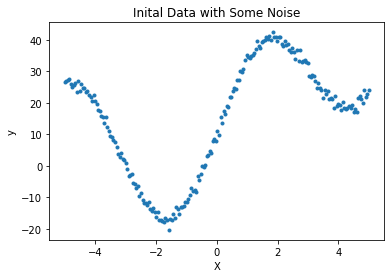

In [214]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#create our variables
X = np.linspace(-5,5,200)
y = np.linspace(0,1,200)
for i in range(len(X)):
    y[i] = 22*math.sin(X[i]) + 0.6*(X[i]**2)+4*X[i] +10 + np.random.normal(0,1) # function given + random noise

#graph
plt.plot(X,y,'.')
plt.title("Inital Data with Some Noise")
plt.xlabel("X")
plt.ylabel("y")

### Problem 3b

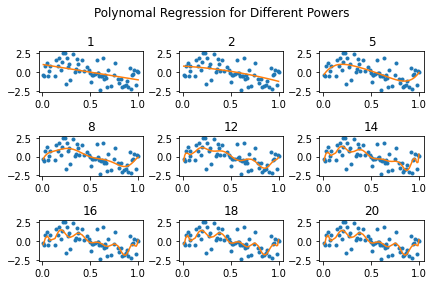

In [215]:
# define our subplot
fig, axs = plt.subplots(3, 3)

### Power = 1
# Use Polynomial features and pipeline to fit data
power = 1
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

axs[0, 0].plot(X_tr, y_tr,'.')
axs[0, 0].plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
axs[0, 0].set_title("1")

### Power = 2
# Use Polynomial features and pipeline to fit data
power = 2
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

axs[0, 1].plot(X_tr, y_tr,'.')
axs[0, 1].plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
axs[0, 1].set_title("2")

### Power = 5
# Use Polynomial features and pipeline to fit data
power = 5
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

axs[0, 2].plot(X_tr, y_tr,'.')
axs[0, 2].plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
axs[0, 2].set_title("5")

### Power = 8
# Use Polynomial features and pipeline to fit data
power = 8
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

axs[1, 0].plot(X_tr, y_tr,'.')
axs[1, 0].plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
axs[1, 0].set_title("8")

### Power = 12
# Use Polynomial features and pipeline to fit data
power = 12
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

axs[1, 1].plot(X_tr, y_tr,'.')
axs[1, 1].plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
axs[1, 1].set_title("12")

### Power = 14
# Use Polynomial features and pipeline to fit data
power = 14
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

axs[1, 2].plot(X_tr, y_tr,'.')
axs[1, 2].plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
axs[1, 2].set_title("14")

### Power = 16
# Use Polynomial features and pipeline to fit data
power = 16
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

axs[2, 0].plot(X_tr, y_tr,'.')
axs[2, 0].plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
axs[2, 0].set_title("16")

### Power = 18
# Use Polynomial features and pipeline to fit data
power = 18
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

axs[2, 1].plot(X_tr, y_tr,'.')
axs[2, 1].plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
axs[2, 1].set_title("18")

### Power = 20
# Use Polynomial features and pipeline to fit data
power = 20
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

axs[2, 2].plot(X_tr, y_tr,'.')
axs[2, 2].plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
axs[2, 2].set_title("20")
fig.suptitle('Polynomal Regression for Different Powers')
fig.tight_layout()


The larger polynomals give the best fit to the training data. The polynomail degree 20 is the best fit for the training data specifically. However, this might not be optimal for the model since it is "overfitting" the data and would not be a good representative of other data. For the optimal model we would want to use a smaller, more general degree like 5 whcih fits the data well but does not sucum to the noise.

### Problem 3c

In [216]:
def linear_regression(X_train, y_train, X_test, y_test, power):
    # Use Polynomial features and pipeline to fit data
    poly_features = PolynomialFeatures(degree = power)
    lrg = LinearRegression()
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
    pipeline.fit(X_train[:,np.newaxis], y_train)
    
    # Get predication with the model trained with pipeline
    pred_train = pipeline.predict(X_train[:,np.newaxis])
    pred_test = pipeline.predict(X_test[:,np.newaxis])
    
    # MSE and RSS
    #Call the mean_squared_error function from sklearn.metrics
    train_mse = mean_squared_error(y_train,pred_train)
    test_mse = mean_squared_error(y_test,pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)

    ret = [train_mse, test_mse, train_rss, test_rss]
    ret.extend([pipeline.steps[1][1].intercept_])
    ret.extend(pipeline.steps[1][1].coef_[1:])
    return ret

In [217]:
#Initialize a dataframe called coef_matrix_simple to store the results:

i_range = [1,2,5,8,12,14,16,18,20]

col = ['train_mse','test_mse', 'train_rss','test_rss'] + ['w%d'%i for i in range(21)]
ind = ['model_pow_%d'%i for i in range(21)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
#If you want, this can also be a list - adjust your fxn definition accordingly
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers (1 - 20) and assimilate results
for i in range(21):
    coef_matrix_simple.iloc[i-1,0:i+5] = linear_regression(X_tr, y_tr, X_te, y_te, power=i)
list = []
for i in range(0,21):
    string = "w"
    string += str(i)
    list.append(string)
# modify result matrix to only have the values we want
coef_matrix_simple.drop(list, axis = 1, inplace = True)
coef_matrix_simple.drop(['model_pow_0','model_pow_3','model_pow_4','model_pow_6','model_pow_7','model_pow_9','model_pow_10','model_pow_11','model_pow_13','model_pow_15','model_pow_17','model_pow_19'], axis = 0, inplace = True)
# print result matrix 
coef_matrix_simple

,train_mse,test_mse,train_rss,test_rss
model_pow_1,1.1,0.76,75,25
model_pow_2,0.94,0.73,63,24
model_pow_5,0.93,0.76,62,25
model_pow_8,0.92,0.84,61,28
model_pow_12,0.88,1.2,59,41
model_pow_14,0.84,0.97,56,32
model_pow_16,0.84,1,56,33
model_pow_18,0.83,1.1,56,35
model_pow_20,1.5,1.3,1e+02,42


Overfitting is when your learning model is so complex it represents the training data well but are at a risk of being too specifc for noisy or unrepresentative training data whcih can make it not good for testing data.

Underfitting is is the opposite. It is when your leanring model is too simple it oversimplifies the data, failing to capture important regulatires/patterns.

From looking at the data, we can see that the model with power 12 is the best representative of the training and test data. This is a little bit higher than my inital predictin but still close.